In [54]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("NDTV_Nupur_Sharma_Controversy.csv")

In [84]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [85]:
df.head()

,news_title,news_details,news_date,source_name
0,उमेश कोल्हे हत्याकांड : NIA ने आरोपी शमीम अहमद पर रखा 2 लाख रुपये का इनाम,"अमरावती (Amravati) में मेडिकल स्टोर के मालिक उमेश कोल्हे की हत्या (Umesh Kolhe murder) सिर्फ इसलिए कर दी गई थी, क्योंकि उन्होंने नुपुर शर्मा(Nupur Sharma) के समर्थन में सोशल मीडिया पर पोस्ट लिखा था. जांच एजेंसी एनआईए इस मामले में अभी तक आठ के करीब आरोपियों को गिरफ्तार कर चुकी है.","मंगलवार सितम्बर 13, 2022 09:37 AM IST",NDTV News
1,निलंबित BJP नेता नूपुर शर्मा की गिरफ्तारी की याचिका पर सुप्रीम कोर्ट का सुनवाई से इनकार,याचिका में कहा गया था कि नूपुर शर्मा के बयान की वजह से हमारे महान राष्ट्र की छवि कलंकित हुई है.,"शुक्रवार सितम्बर 9, 2022 01:28 PM IST",NDTV News
2,"विरोधियों पर जमकर बरसे मनसे प्रमुख राज ठाकरे, नूपूर शर्मा के समर्थन में बोली बड़ी बात",राज्य की मौजूदा हालात पर राज ठाकरे बोले कि अभी जो राज्य में हुआ वो राजनीति नही है. मुझसे पूछा गया था आपने भी बगावत की थी? मैंने कोई बगावत नहीं की. मैं बालासाहेब को मिलकर उन्हें बता कर बाहर निकला था. जब मैं बाला साहेब से मिला तब उन्होंने दोनो हाथ फैलाकर मुझे गले लगाया और कहा कि जा. इसलिए मैने कोई दगा नहीं की. आप सबके भरोसे पर पार्टी खड़ी की.,"मंगलवार अगस्त 23, 2022 02:54 PM IST",NDTV News
3,"नूपुर शर्मा की हत्या की फिराक में था जैश का संदिग्ध आतंकी, यूपी के सहारनपुर से हुआ गिरफ्तार",पाकिस्तान और अफगानिस्तान के जैश ए मोहम्मद और तहरीक ए पाकिस्तान के आतंकियों से नदीम चैट और वॉइस मैसेज के जरिए बातचीत कर रहा था.,"शुक्रवार अगस्त 12, 2022 08:29 PM IST",NDTV News
4,BJP की पूर्व प्रवक्ता नूपुर शर्मा के खिलाफ सभी FIR दिल्ली ट्रांसफर होंगी : सुप्रीम कोर्ट,सुप्रीम कोर्ट ने बुधवार को हुई सुनवाई के ये फैसला सुनाया. सुप्रीम कोर्ट ने सुनवाई के बाद कहा कि इन तमाम FIR को लेकर जांच अब दिल्ली पुलिस करेगी.,"बुधवार अगस्त 10, 2022 04:39 PM IST",NDTV News


In [68]:
df.columns

Index(['news_title', 'news_details', 'news_date', 'source_name'], dtype='object')

In [69]:
def count_length():
    df['word_count'] = df['news_title'].apply(lambda x: len(str(x).split(" ")))

In [70]:
count_length()

In [8]:
df.tail(10)

,news_title,news_details,news_date,source_name,word_count
121,"बीजेपी प्रवक्ता नुपुर शर्मा के खिलाफ मुंबई पुलिस ने दर्ज किया केस, पैगंबर मोहम्मद पर टिप्पणी के चलते विवादों में हैं",रजा अकादमी का आरोप है कि बीजेपी प्रवक्ता नुपुर शर्मा ने एक चैनल पर इस्लाम और पैगंबर मोहम्मद के बारे में आपत्तिजनक टिप्पणी कर मुस्लिम समाज की भावनाओ को ठेस पहुंचाई है .,"रविवार मई 29, 2022 11:17 AM IST",NDTV News,21
122,"ऑपइंडिया की संपादक को राहत, प.बंगाल सरकार ने SC में केस वापस लेने की जानकारी दी","सुप्रीम कोर्ट ने कहा कि जो सार्वजनिक डोमेन में है, उसका परिणाम पत्रकारों को भुगतना पड़ता है. राजनीतिक वर्ग सहित लोगों के लिए आत्मचिंतन का समय है.","गुरुवार दिसम्बर 9, 2021 12:13 PM IST",NDTV News,16
123,"Menstrual Problems: इर्रेगुलर पीरियड्स क्‍या हैं, क्या इस दौरान शरीर‍िक संबंध बनाना ठीक है? डॉक्टर से जानें पीरियड्स से जुड़े हर सवाल का जवाब","पीरियड्स को लेकर कई सवाल होते हैं, जो बार-बार महिलाओं के मन में आते रहते हैं, जैसे पीरियड्स इर्रेगुलर क्‍यों हो जाते हैं ?, पीरियड्स के दौरान शरीर‍िक संबंध बनाना ठीक है या गलत?. डॉ. नुपुर गुप्ता (निदेशक, प्रसूति एवं स्त्री रोग विशेषज्ञ, फोर्टिस गुरुग्राम) ने पीरिड्स से जुड़े इन्हीं तमाम सवालों की जानकारी दी.","बुधवार अक्टूबर 6, 2021 12:46 PM IST",NDTV News,24
124,"बंगाल हिंसा मामला : सुप्रीम कोर्ट से OpIndia की संपादक नुपुर शर्मा को राहत, एक अन्‍य FIR पर भी लगाई रोक","जस्टिस संजय किशन कौल और जस्टिस एम एम सुंदरेश की बेंच ने ऑपइंडिया की संपादक नूपुर जे शर्मा और संस्थापक राहुल रोशन के खिलाफ दर्ज FIR पर जांच पर रोक लगाई है . ये FIR तेलनीपाड़ा सांप्रदायिक दंगों के संबंध में ऑपइंडिया में प्रकाशित रिपोर्टों के खिलाफ 10 जून, 2020 को दर्ज की गई थी","शुक्रवार सितम्बर 3, 2021 01:26 PM IST",NDTV News,21
125,#SareeTwitter में प्रियंका गांधी वाड्रा और यामी गौतम ही नहीं आम महिलाओं की ये तस्वीरें भी हुईं Viral,"#SareeTwitter सोशल मीडिया पर ट्रेंड कर रहा है. प्रियंका गांधी वाड्रा, टीवी एट्रेस सुज़ैन बर्नेट, शिव सेना नेता प्रिंयका चतुर्वेदी, बीजेपी नेता नुपूर शर्मा, एक्ट्रेस नगमा, एक्ट्रेस मीरा चोपड़ा, यामी गौतम, गुल पनाग, दिव्या दत्ता, रेणुका शहाणे और लेखिका नंदीता अइर जैसी हस्तियों ने ट्विटर पर अपनी-अपनी साड़ी पोस्ट डाली.","बुधवार जुलाई 17, 2019 01:17 PM IST",NDTV News,18
126,"गौतम गंभीर के ट्वीट का उमर अब्दुल्ला ने दिया जवाब तो आक्रमक हुई बीजेपी, कहा- आप तो बस होटल में...",बीजेपी नेता नुपुर शर्मा के ट्वीट के जवाब में उमर अब्दुल्ला ने एक और ट्वीट किया. उमर ने लिखा कि इन लोगों का अहंकार. उनके नेता के विनम्रता की पोल खोलते हैं. मेरी छोटी सी शुरुआत कुछ ऐसी है जिसके बारे में मुझे शर्म आनी चाहिए. किसी भी ईमानदार नौकरी में गरिमा है और मुझे गर्व है कि मैंने कैसे शुरुआत की.,"बुधवार अप्रैल 3, 2019 06:09 PM IST",NDTV News,20
127,"बीजेपी नेता ने गुजरात दंगों की तस्वीर बंगाल की बताकर की पोस्ट, ट्विटर पर हुई आलोचना",दिल्ली भाजपा प्रवक्ता नूपुर शर्मा को 2002 गुजरात दंगों की एक तस्वीर को पश्चिम बंगाल के बसीरहाट में हिंसा की तस्वीर कथित रूप से बताने पर ट्विटर पर आलोचनाओं का सामना करना पड़ा है.,"सोमवार जुलाई 10, 2017 09:15 AM IST",NDTV News,16
128,'आप' विधायक संदीप कुमार के बीजेपी के लिए प्रचार करने पर फंसी बीजेपी ने दिया यह जवाब,अपने विधानसभा क्षेत्र की एक महिला से कथित रेप के आरोप में जेल जा चुके दिल्ली के बर्खास्त मंत्री संदीप कुमार अब एमसीडी चुनावों में बीजेपी के लिए प्रचार करते दिखे. संदीप कुमार के बीजेपी के लिए वोट मांगने से बीजेपी नेता असहज हो गए.,"मंगलवार अप्रैल 18, 2017 10:08 AM IST",NDTV News,17
129,केजरीवाल ने नूपुर शर्मा को 31 हजार से अधिक वोटों से हराया,"केजरीवाल को 57,213 वोट मिले, जबकि नूपुर को केवल 25,630 मत हासिल हुए। दिल्ली की पूर्व मंत्री और कांग्रेस उम्मीदवार किरण वालिया 4781 मतों के साथ तीसरे स्थान पर रहीं।","मंगलवार फ़रवरी 10, 2015 02:34 PM IST",NDTV News,12
130,केजरीवाल को चुनौती दे रहीं बीजेपी की नूपुर शर्मा हैं कौन? आइए जानें...,दिल्ली विधानसभा चुनाव में बीजेपी ने नूपुर शर्मा को नई दिल्ली सीट से टिकट दिया है। इस सीट पर नूपुर के सामने आम आदमी पार्टी के संयोजक अरविंद केजरीवाल होंगे। आखिर ये नूपुर शर्मा हैं।,"मंगलवार जनवरी 20, 2015 12:05 PM IST",NDTV News,13


## Generating Tokens

In [ ]:
!pip3 install indic

In [ ]:
!pip3 install indicnlp

In [ ]:
!pip install indic_nlp_library

In [9]:
from indicnlp.tokenize import indic_tokenize

In [86]:
for i in range(len(df)):
    df['news_title'][i].replace('नूपुर', 'नुपुर')

In [87]:
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
df['news_title'] = df['news_title'].apply(lambda x: tokenization(x))

In [11]:
df.head()

,news_title,news_details,news_date,source_name,word_count
0,"[उमेश, कोल्हे, हत्याकांड, :, NIA, ने, आरोपी, शमीम, अहमद, पर, रखा, 2, लाख, रुपये, का, इनाम]","अमरावती (Amravati) में मेडिकल स्टोर के मालिक उमेश कोल्हे की हत्या (Umesh Kolhe murder) सिर्फ इसलिए कर दी गई थी, क्योंकि उन्होंने नुपुर शर्मा(Nupur Sharma) के समर्थन में सोशल मीडिया पर पोस्ट लिखा था. जांच एजेंसी एनआईए इस मामले में अभी तक आठ के करीब आरोपियों को गिरफ्तार कर चुकी है.","मंगलवार सितम्बर 13, 2022 09:37 AM IST",NDTV News,16
1,"[निलंबित, BJP, नेता, नूपुर, शर्मा, की, गिरफ्तारी, की, याचिका, पर, सुप्रीम, कोर्ट, का, सुनवाई, से, इनकार]",याचिका में कहा गया था कि नूपुर शर्मा के बयान की वजह से हमारे महान राष्ट्र की छवि कलंकित हुई है.,"शुक्रवार सितम्बर 9, 2022 01:28 PM IST",NDTV News,16
2,"[विरोधियों, पर, जमकर, बरसे, मनसे, प्रमुख, राज, ठाकरे, ,, नूपूर, शर्मा, के, समर्थन, में, बोली, बड़ी, बात]",राज्य की मौजूदा हालात पर राज ठाकरे बोले कि अभी जो राज्य में हुआ वो राजनीति नही है. मुझसे पूछा गया था आपने भी बगावत की थी? मैंने कोई बगावत नहीं की. मैं बालासाहेब को मिलकर उन्हें बता कर बाहर निकला था. जब मैं बाला साहेब से मिला तब उन्होंने दोनो हाथ फैलाकर मुझे गले लगाया और कहा कि जा. इसलिए मैने कोई दगा नहीं की. आप सबके भरोसे पर पार्टी खड़ी की.,"मंगलवार अगस्त 23, 2022 02:54 PM IST",NDTV News,16
3,"[नूपुर, शर्मा, की, हत्या, की, फिराक, में, था, जैश, का, संदिग्ध, आतंकी, ,, यूपी, के, सहारनपुर, से, हुआ, गिरफ्तार]",पाकिस्तान और अफगानिस्तान के जैश ए मोहम्मद और तहरीक ए पाकिस्तान के आतंकियों से नदीम चैट और वॉइस मैसेज के जरिए बातचीत कर रहा था.,"शुक्रवार अगस्त 12, 2022 08:29 PM IST",NDTV News,18
4,"[BJP, की, पूर्व, प्रवक्ता, नूपुर, शर्मा, के, खिलाफ, सभी, FIR, दिल्ली, ट्रांसफर, होंगी, :, सुप्रीम, कोर्ट]",सुप्रीम कोर्ट ने बुधवार को हुई सुनवाई के ये फैसला सुनाया. सुप्रीम कोर्ट ने सुनवाई के बाद कहा कि इन तमाम FIR को लेकर जांच अब दिल्ली पुलिस करेगी.,"बुधवार अगस्त 10, 2022 04:39 PM IST",NDTV News,16


In [88]:
for i in range(len(df)):
    df['news_title'][i] = [s.replace("\n", "") for s in df['news_title'][i]]

In [89]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

In [90]:
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_be_removed)]
count_length()
df.tail(10)

,news_title,news_details,news_date,source_name,word_count
121,"[बीजेपी, प्रवक्ता, नुपुर, शर्मा, खिलाफ, मुंबई, पुलिस, दर्ज, केस, पैगंबर, मोहम्मद, टिप्पणी, चलते, विवादों]",रजा अकादमी का आरोप है कि बीजेपी प्रवक्ता नुपुर शर्मा ने एक चैनल पर इस्लाम और पैगंबर मोहम्मद के बारे में आपत्तिजनक टिप्पणी कर मुस्लिम समाज की भावनाओ को ठेस पहुंचाई है .,"रविवार मई 29, 2022 11:17 AM IST",NDTV News,14
122,"[ऑपइंडिया, संपादक, राहत, प, बंगाल, सरकार, SC, केस, वापस, लेने, जानकारी, दी]","सुप्रीम कोर्ट ने कहा कि जो सार्वजनिक डोमेन में है, उसका परिणाम पत्रकारों को भुगतना पड़ता है. राजनीतिक वर्ग सहित लोगों के लिए आत्मचिंतन का समय है.","गुरुवार दिसम्बर 9, 2021 12:13 PM IST",NDTV News,12
123,"[Menstrual, Problems, इर्रेगुलर, पीरियड्स, क्‍या, क्या, दौरान, शरीर‍िक, संबंध, बनाना, ठीक, डॉक्टर, जानें, पीरियड्स, जुड़े, हर, सवाल, जवाब]","पीरियड्स को लेकर कई सवाल होते हैं, जो बार-बार महिलाओं के मन में आते रहते हैं, जैसे पीरियड्स इर्रेगुलर क्‍यों हो जाते हैं ?, पीरियड्स के दौरान शरीर‍िक संबंध बनाना ठीक है या गलत?. डॉ. नुपुर गुप्ता (निदेशक, प्रसूति एवं स्त्री रोग विशेषज्ञ, फोर्टिस गुरुग्राम) ने पीरिड्स से जुड़े इन्हीं तमाम सवालों की जानकारी दी.","बुधवार अक्टूबर 6, 2021 12:46 PM IST",NDTV News,18
124,"[बंगाल, हिंसा, मामला, सुप्रीम, कोर्ट, OpIndia, संपादक, नुपुर, शर्मा, राहत, अन्‍य, FIR, लगाई, रोक]","जस्टिस संजय किशन कौल और जस्टिस एम एम सुंदरेश की बेंच ने ऑपइंडिया की संपादक नूपुर जे शर्मा और संस्थापक राहुल रोशन के खिलाफ दर्ज FIR पर जांच पर रोक लगाई है . ये FIR तेलनीपाड़ा सांप्रदायिक दंगों के संबंध में ऑपइंडिया में प्रकाशित रिपोर्टों के खिलाफ 10 जून, 2020 को दर्ज की गई थी","शुक्रवार सितम्बर 3, 2021 01:26 PM IST",NDTV News,14
125,"[SareeTwitter, प्रियंका, गांधी, वाड्रा, यामी, गौतम, आम, महिलाओं, तस्वीरें, हुईं, Viral]","#SareeTwitter सोशल मीडिया पर ट्रेंड कर रहा है. प्रियंका गांधी वाड्रा, टीवी एट्रेस सुज़ैन बर्नेट, शिव सेना नेता प्रिंयका चतुर्वेदी, बीजेपी नेता नुपूर शर्मा, एक्ट्रेस नगमा, एक्ट्रेस मीरा चोपड़ा, यामी गौतम, गुल पनाग, दिव्या दत्ता, रेणुका शहाणे और लेखिका नंदीता अइर जैसी हस्तियों ने ट्विटर पर अपनी-अपनी साड़ी पोस्ट डाली.","बुधवार जुलाई 17, 2019 01:17 PM IST",NDTV News,11
126,"[गौतम, गंभीर, ट्वीट, उमर, अब्दुल्ला, जवाब, आक्रमक, बीजेपी, बस, होटल]",बीजेपी नेता नुपुर शर्मा के ट्वीट के जवाब में उमर अब्दुल्ला ने एक और ट्वीट किया. उमर ने लिखा कि इन लोगों का अहंकार. उनके नेता के विनम्रता की पोल खोलते हैं. मेरी छोटी सी शुरुआत कुछ ऐसी है जिसके बारे में मुझे शर्म आनी चाहिए. किसी भी ईमानदार नौकरी में गरिमा है और मुझे गर्व है कि मैंने कैसे शुरुआत की.,"बुधवार अप्रैल 3, 2019 06:09 PM IST",NDTV News,10
127,"[बीजेपी, नेता, गुजरात, दंगों, तस्वीर, बंगाल, बताकर, पोस्ट, ट्विटर, आलोचना]",दिल्ली भाजपा प्रवक्ता नूपुर शर्मा को 2002 गुजरात दंगों की एक तस्वीर को पश्चिम बंगाल के बसीरहाट में हिंसा की तस्वीर कथित रूप से बताने पर ट्विटर पर आलोचनाओं का सामना करना पड़ा है.,"सोमवार जुलाई 10, 2017 09:15 AM IST",NDTV News,10
128,"[विधायक, संदीप, कुमार, बीजेपी, प्रचार, फंसी, बीजेपी, जवाब]",अपने विधानसभा क्षेत्र की एक महिला से कथित रेप के आरोप में जेल जा चुके दिल्ली के बर्खास्त मंत्री संदीप कुमार अब एमसीडी चुनावों में बीजेपी के लिए प्रचार करते दिखे. संदीप कुमार के बीजेपी के लिए वोट मांगने से बीजेपी नेता असहज हो गए.,"मंगलवार अप्रैल 18, 2017 10:08 AM IST",NDTV News,8
129,"[केजरीवाल, नूपुर, शर्मा, 31, हजार, अधिक, वोटों, हराया]","केजरीवाल को 57,213 वोट मिले, जबकि नूपुर को केवल 25,630 मत हासिल हुए। दिल्ली की पूर्व मंत्री और कांग्रेस उम्मीदवार किरण वालिया 4781 मतों के साथ तीसरे स्थान पर रहीं।","मंगलवार फ़रवरी 10, 2015 02:34 PM IST",NDTV News,8
130,"[केजरीवाल, चुनौती, दे, रहीं, बीजेपी, नूपुर, शर्मा, आइए, जानें]",दिल्ली विधानसभा चुनाव में बीजेपी ने नूपुर शर्मा को नई दिल्ली सीट से टिकट दिया है। इस सीट पर नूपुर के सामने आम आदमी पार्टी के संयोजक अरविंद केजरीवाल होंगे। आखिर ये नूपुर शर्मा हैं।,"मंगलवार जनवरी 20, 2015 12:05 PM IST",NDTV News,9


## Removing Unnecessary Hindi Words

In [93]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['news_title'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'शर्मा': 61, 'नुपुर': 57, 'पैगंबर': 25, 'पुलिस': 23, 'टिप्पणी': 20, 'खिलाफ': 18, 'BJP': 16, 'कोर्ट': 16, 'गिरफ्तार': 16, 'लेकर': 15, 'सुप्रीम': 13, 'हत्या': 13, 'गिरफ्तारी': 12, 'अब': 12, 'विवाद': 12, 'समर्थन': 11, 'पोस्ट': 11, 'नेता': 10, 'बयान': 10, 'दर्ज': 9, 'बीजेपी': 9, '2': 8, 'दिल्ली': 8, 'उदयपुर': 8, 'मोहम्मद': 8, 'विवादित': 8, 'ओवैसी': 8, 'मामला': 7, 'मुंबई': 7, 'ट्वीट': 7, 'वालों': 7, 'बीच': 7, 'हत्याकांड': 6, 'युवक': 6, 'सोशल': 6, 'मीडिया': 6, 'केस': 6, 'हिंसा': 6, 'कार्रवाई': 6, 'Udaipur': 6, 'Murder': 6, 'रांची': 6, 'याचिका': 5, 'प्रवक्ता': 5, 'खतरे': 5, 'धमकी': 5, 'राजस्थान': 5, 'कर्फ्यू': 5, 'घंटे': 5, 'पेश': 5, 'मांग': 5, 'बुलडोजर': 5, 'दी': 5, 'उमेश': 4, 'कोल्हे': 4, 'पूर्व': 4, 'FIR': 4, 'आरोप': 4, '6': 4, 'कन्हैया': 4, 'लाल': 4, 'टेलर': 4, 'रहीं': 4, 'हुईं': 4, 'पांच': 4, 'आपत्तिजनक': 4, 'दर्द': 4, 'लोग': 4, 'भीड़': 4, 'विरोध': 4, 'कुवैत': 4, 'रिपोर्ट': 4, 'चीफ': 4, 'गौतम': 4, 'आरोपी': 3, 'निलंबित': 3, 'प्रमुख': 3, 'राहत': 3, 'आलोचना': 3, 'डालने': 3, 'मामले'

In [63]:
to_remove = ['नूपुर', 'लेकर', 'अब', 'वालों', 'Sharma', 'Nupur']
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_remove)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
for i in range(len(df)):
    df['news_title'][i] = [s.replace("नूपुर", "नुपुर") for s in df['news_title'][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (least_common)]
print(least_common)

['आइए', 'दे', 'चुनौती', 'हराया', 'वोटों', 'अधिक', 'हजार', '31', 'प्रचार', 'संदीप', 'विधायक', 'ट्विटर', 'बताकर', 'दंगों', 'गुजरात', 'होटल', 'बस', 'आक्रमक', 'Viral', 'तस्वीरें', 'महिलाओं', 'आम', 'यामी', 'वाड्रा', 'प्रियंका', 'SareeTwitter', 'रोक', 'अन्\u200dय', 'OpIndia', 'हर', 'डॉक्टर', 'ठीक', 'बनाना', 'संबंध', 'शरीर\u200dिक', 'क्\u200dया', 'इर्रेगुलर', 'Problems', 'Menstrual', 'जानकारी', 'लेने', 'वापस', 'प', 'ऑपइंडिया', 'विवादों', 'चलते', 'किनारा', 'सम्मान', 'करती']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df.head()

,news_title,news_details,news_date,source_name,word_count
0,"[उमेश, कोल्हे, हत्याकांड, NIA, आरोपी, शमीम, अहमद, रखा, 2, लाख, रुपये, इनाम]","अमरावती (Amravati) में मेडिकल स्टोर के मालिक उमेश कोल्हे की हत्या (Umesh Kolhe murder) सिर्फ इसलिए कर दी गई थी, क्योंकि उन्होंने नुपुर शर्मा(Nupur Sharma) के समर्थन में सोशल मीडिया पर पोस्ट लिखा था. जांच एजेंसी एनआईए इस मामले में अभी तक आठ के करीब आरोपियों को गिरफ्तार कर चुकी है.","मंगलवार सितम्बर 13, 2022 09:37 AM IST",NDTV News,12
1,"[निलंबित, BJP, नेता, नूपुर, शर्मा, गिरफ्तारी, याचिका, सुप्रीम, कोर्ट, सुनवाई, इनकार]",याचिका में कहा गया था कि नूपुर शर्मा के बयान की वजह से हमारे महान राष्ट्र की छवि कलंकित हुई है.,"शुक्रवार सितम्बर 9, 2022 01:28 PM IST",NDTV News,11
2,"[विरोधियों, जमकर, बरसे, मनसे, प्रमुख, राज, ठाकरे, नूपूर, शर्मा, समर्थन, बोली, बड़ी, बात]",राज्य की मौजूदा हालात पर राज ठाकरे बोले कि अभी जो राज्य में हुआ वो राजनीति नही है. मुझसे पूछा गया था आपने भी बगावत की थी? मैंने कोई बगावत नहीं की. मैं बालासाहेब को मिलकर उन्हें बता कर बाहर निकला था. जब मैं बाला साहेब से मिला तब उन्होंने दोनो हाथ फैलाकर मुझे गले लगाया और कहा कि जा. इसलिए मैने कोई दगा नहीं की. आप सबके भरोसे पर पार्टी खड़ी की.,"मंगलवार अगस्त 23, 2022 02:54 PM IST",NDTV News,13
3,"[नूपुर, शर्मा, हत्या, फिराक, जैश, संदिग्ध, आतंकी, यूपी, सहारनपुर, गिरफ्तार]",पाकिस्तान और अफगानिस्तान के जैश ए मोहम्मद और तहरीक ए पाकिस्तान के आतंकियों से नदीम चैट और वॉइस मैसेज के जरिए बातचीत कर रहा था.,"शुक्रवार अगस्त 12, 2022 08:29 PM IST",NDTV News,10
4,"[BJP, पूर्व, प्रवक्ता, नूपुर, शर्मा, खिलाफ, FIR, दिल्ली, ट्रांसफर, होंगी, सुप्रीम, कोर्ट]",सुप्रीम कोर्ट ने बुधवार को हुई सुनवाई के ये फैसला सुनाया. सुप्रीम कोर्ट ने सुनवाई के बाद कहा कि इन तमाम FIR को लेकर जांच अब दिल्ली पुलिस करेगी.,"बुधवार अगस्त 10, 2022 04:39 PM IST",NDTV News,12


## Word Cloud

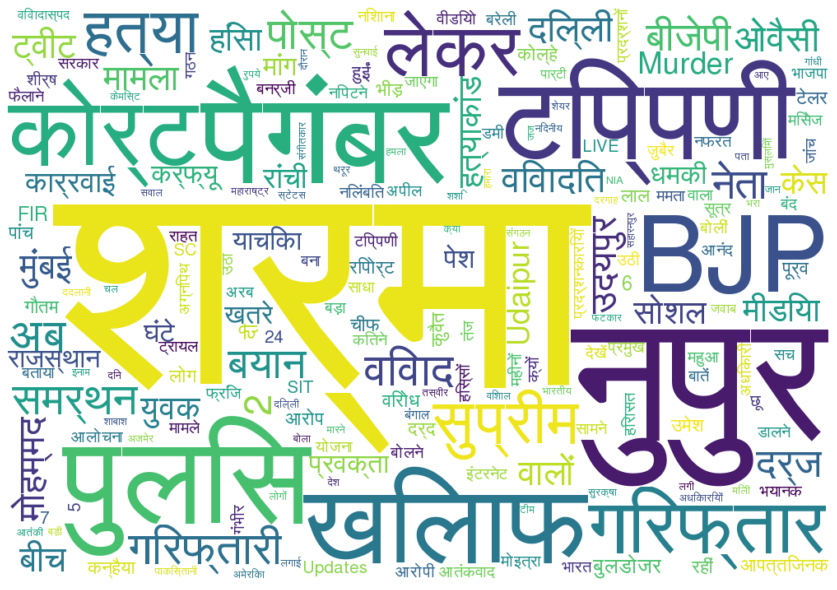

In [94]:
df_list = []
for i in range(len(df)):
    df_list +=df['news_title'][i]

font = "gargi.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## ZEE NEWS

In [33]:
df = pd.read_csv("/content/zeenews_Nupur_Sharma_Controversy_rows_deleted.csv")

In [36]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [37]:
df.head()

,news_title,news_details,news_date,source_name
0,"नवीन जिंदल ने लिखा- 'जय श्री राम', मिली 'सर तन से जुदा' की धमकी, जानें पूरा मामला",Naveen Jindal Threat: पैगंबर मुहम्मद को लेकर कथित विवादित टिप्पणी के लिए भाजपा द्वारा बर्खास्त किए गए नवीन जिंदल को ट्विटर पर जान से मारने की धमकी मिली है.,"Sep 14,2022, 22:10 PM IST",ZEE News
1,"कन्हैया लाल कांड की तर्ज पर मुज्जफरनगर में टेलर को दी धमकी, एक्शन में योगी की पुलिस",सोशल मीडिया पोस्ट को लेकर अभी राजस्थान के उदयपुर हत्याकांड की यादें पुरानी नहीं हुई हैं. इसी कड़ी में उत्तर प्रदेश के मुजफ्फरनगर में एक टेलर को धमकी भरा खत मिला है. पत्र में कन्हैया लाल और नुपूर शर्मा का जिक्र करते हुए जान से मारने की धमकी दी गई है.,"Aug 24,2022, 19:20 PM IST",ZEE News
2,"नूपुर शर्मा के लिए अब राज ठाकरे ने कह दी ये बड़ी बात, याद दिलाया जाकिर नाइक का बयान",Prophet Comment Row: नूपुर शर्मा ने मई के आखिरी हफ्ते में एक टीवी चैनल पर डिबेट के दौरान पैगंबर मोहम्मद पर कमेंट किया था. इसको लेकर काफी बवाल हुआ था और देशभर में प्रदर्शन हुए थे.,"Aug 23,2022, 23:17 PM IST",ZEE News
3,हैदराबाद हेट स्पीच की 'नई प्रयोगशाला'! 'सर तन से जुदा' गैंग का ब्रेन मैपिंग टेस्ट,"DNA Analysis: तेलंगाना में बीजेपी के विधायक टी राजा, जिन्होंने पैगंबर मोहम्मद पर विवादित बयान दिया. दूसरे स्टैंड अप कॉमेडियन मुनव्वर फारुकी, जो अकसर अपने शो में हिंदू देवी-देवताओं से जुड़ी अपमानजनक टिप्पणी करते रहे हैं.","Aug 23,2022, 23:02 PM IST",ZEE News
4,Deshhit: पैगंबर का अपमान...'सिर कलम' का फरमान,बीजेपी विधायक टी. राजा सिंह की पैगंबर साहब पर आपत्तिजनक टिप्पणी से तेलंगाना में बवाल बढ़ गया. आज उन्हें इस मामले में गिरफ्तार भी किया गया. राजा सिंह के वकील ने दावा किया है कि कोर्ट ने उन्हें फौरन रिहा करने का आदेश दिया है. पैगंबर साहब के अपमान का आरोप लगने के बाद BJP ने राजा सिंह को निलंबित कर दिया है और साथ ही उन्हें शो कॉज नोटिस भी जारी किया गया है.,"Aug 23,2022, 22:42 PM IST",ZEE News


In [38]:
def count_length():
    df['word_count'] = df['news_title'].apply(lambda x: len(str(x).split(" ")))

In [39]:
count_length()

In [40]:
df.tail(10)

,news_title,news_details,news_date,source_name,word_count
229,"श्रीगंगानगर से पकड़ा गया पाकिस्तानी घुसपैठिया, नूपुर शर्मा का कत्ल करने आया था",Sri Ganganagar Rajasthan/ Nupur Sharma पैगंबर मोहम्मद साहब को लेकर टीवी डिबेट के दौरान विवादित बयान देने वाली नूपुर शर्मा ने अपनी जान को खतरा बताते हुए सभी FIR दिल्ली में ट्रांसफर करने की मांग की थी और गिरफ्तारी पर भी रोक लगाने की अपील की थी. जिस पर अदालत 10 अगस्त तक उनके खिलाफ कोई कार्रवाई नहीं करने का हुक्म दिया है. इस बीच श्रीगंगानगर से एक बड़ी खबर सामने आ रही है. दरअसल यहां से एक पाकिस्तानी घुसपैठिये को गिरफ्तार किया गया है. जिसको लेकर दावा किया जा रहा है कि वो नूपुर शर्मा का कत्ल करने के मकसद से आया था.,"Jul 19,2022, 17:14 PM IST",ZEE News,13
230,Nupur Sharma Controversy: लगातार धमकियां मिल रही हैं - नूपुर के वकील,पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा की अर्जी पर आज सुप्रीम कोर्ट में सुनवाई होगी. आपको बता दें कि नूपुर शर्मा के वकील ने कहा है कि नूपुर की जान को खतरा है और उन्हें लगातार धमकियां मिल रही हैं.,"Jul 19,2022, 17:02 PM IST",ZEE News,12
231,"नूपुर को 'सुप्रीम' राहत,जिस बेंच ने की थी सख्त टिप्पणी,उसी ने गिरफ्तारी पर लगाई रोक",बीजेपी की निलंबित प्रवक्ता नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है.मंगलवार को शीर्ष कोर्ट ने नूपुर शर्मा की याचिका पर सुनवाई करते हुए 10 अगस्त तक गिरफ्तारी पर रोक लगा दी है.,"Jul 19,2022, 16:59 PM IST",ZEE News,15
232,Nupur Sharma को Supreme Court से बड़ी राहत,पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है. सुप्रीम कोर्ट ने 10 अगस्त तक नूपुर शर्मा की गिरफ्तारी पर रोक लगा दी है. कोर्ट ने कहा है कि अगर नई FIR भी दर्ज होती है तो भी गिरफ्तारी नहीं होगी.,"Jul 19,2022, 16:12 PM IST",ZEE News,8
233,SC में नूपुर की याचिका पर सुनवाई,नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 14:46 PM IST",ZEE News,7
234,नूपुर शर्मा ने सुप्रीम कोर्ट में नई याचिका दायर करके की ये मांग,नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 13:36 PM IST",ZEE News,13
235,Nupur Sharma का वीडियो देखने पर विवाद.दो पक्षों में हुई झड़प,सीतामढ़ी में युवक को नूपुर शर्मा ( Nupur sharma ) का वीडियो देखने पर चाकू मार देने का मामला सामने आया है...जिससे युवक गंभीर रूप से जख्मी हो गया...देखिए पूरी ख़बर...,"Jul 19,2022, 13:11 PM IST",ZEE News,11
236,Nupur Sharma की याचिका पर आज Supreme Court में सुनवाई,BJP की निलंबित प्रवक्ता नूपुर शर्मा ने एक बार फिर से सुप्रीम कोर्ट का दरवाजा खटखटाया है. Nupur Sharma की याचिका पर आज Supreme Court में सुनवाई.. देखिए वीडियो...,"Jul 19,2022, 12:48 PM IST",ZEE News,10
237,नूपुर शर्मा का वीडियो देखने पर युवक पर चाकूओं से किया गया हमला|,बिहार के सीतामढ़ी में एक युवक पर चाकूओं से हमला किया गया. आरोप है कि मोबाइल पर नूपुर शर्मा का वीडियो देखने पर युवक को निशाना बनाया गया. भरे बाजार दौड़ा दौड़ा कर युवक पर हमला किया.,"Jul 19,2022, 10:46 AM IST",ZEE News,13
238,Khabren Khatakhat: तीस्ता और अहमद पटेल की डील पर रईस खान का खुलासा,खबरें खटाखट सेगमेंट जी न्यूज के महत्वपूर्ण बुलेटिन का एक हिस्सा है जिसमें आप सभी जरूरी खबरें देख सकेंगे.,"Jul 19,2022, 9:20 AM IST",ZEE News,13


In [41]:
df['news_title'] = df['news_title'].apply(lambda x: tokenization(x))

In [42]:
df.head()

,news_title,news_details,news_date,source_name,word_count
0,"[नवीन, जिंदल, ने, लिखा, -, ', जय, श्री, राम, ', ,, मिली, ', सर, तन, से, जुदा, ', की, धमकी, ,, जानें, पूरा, मामला]",Naveen Jindal Threat: पैगंबर मुहम्मद को लेकर कथित विवादित टिप्पणी के लिए भाजपा द्वारा बर्खास्त किए गए नवीन जिंदल को ट्विटर पर जान से मारने की धमकी मिली है.,"Sep 14,2022, 22:10 PM IST",ZEE News,17
1,"[कन्हैया, लाल, कांड, की, तर्ज, पर, मुज्जफरनगर, में, टेलर, को, दी, धमकी, ,, एक्शन, में, योगी, की, पुलिस]",सोशल मीडिया पोस्ट को लेकर अभी राजस्थान के उदयपुर हत्याकांड की यादें पुरानी नहीं हुई हैं. इसी कड़ी में उत्तर प्रदेश के मुजफ्फरनगर में एक टेलर को धमकी भरा खत मिला है. पत्र में कन्हैया लाल और नुपूर शर्मा का जिक्र करते हुए जान से मारने की धमकी दी गई है.,"Aug 24,2022, 19:20 PM IST",ZEE News,17
2,"[नूपुर, शर्मा, के, लिए, अब, राज, ठाकरे, ने, कह, दी, ये, बड़ी, बात, ,, याद, दिलाया, जाकिर, नाइक, का, बयान]",Prophet Comment Row: नूपुर शर्मा ने मई के आखिरी हफ्ते में एक टीवी चैनल पर डिबेट के दौरान पैगंबर मोहम्मद पर कमेंट किया था. इसको लेकर काफी बवाल हुआ था और देशभर में प्रदर्शन हुए थे.,"Aug 23,2022, 23:17 PM IST",ZEE News,19
3,"[हैदराबाद, हेट, स्पीच, की, ', नई, प्रयोगशाला, ', !, ', सर, तन, से, जुदा, ', गैंग, का, ब्रेन, मैपिंग, टेस्ट]","DNA Analysis: तेलंगाना में बीजेपी के विधायक टी राजा, जिन्होंने पैगंबर मोहम्मद पर विवादित बयान दिया. दूसरे स्टैंड अप कॉमेडियन मुनव्वर फारुकी, जो अकसर अपने शो में हिंदू देवी-देवताओं से जुड़ी अपमानजनक टिप्पणी करते रहे हैं.","Aug 23,2022, 23:02 PM IST",ZEE News,15
4,"[Deshhit, :, पैगंबर, का, अपमान, ., ., ., ', सिर, कलम, ', का, फरमान]",बीजेपी विधायक टी. राजा सिंह की पैगंबर साहब पर आपत्तिजनक टिप्पणी से तेलंगाना में बवाल बढ़ गया. आज उन्हें इस मामले में गिरफ्तार भी किया गया. राजा सिंह के वकील ने दावा किया है कि कोर्ट ने उन्हें फौरन रिहा करने का आदेश दिया है. पैगंबर साहब के अपमान का आरोप लगने के बाद BJP ने राजा सिंह को निलंबित कर दिया है और साथ ही उन्हें शो कॉज नोटिस भी जारी किया गया है.,"Aug 23,2022, 22:42 PM IST",ZEE News,7


In [43]:
for i in range(len(df)):
    df['news_title'][i] = [s.replace("\n", "") for s in df['news_title'][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

In [45]:
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_be_removed)]
count_length()
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,news_title,news_details,news_date,source_name,word_count
229,"[श्रीगंगानगर, पकड़ा, पाकिस्तानी, घुसपैठिया, नूपुर, शर्मा, कत्ल, आया]",Sri Ganganagar Rajasthan/ Nupur Sharma पैगंबर मोहम्मद साहब को लेकर टीवी डिबेट के दौरान विवादित बयान देने वाली नूपुर शर्मा ने अपनी जान को खतरा बताते हुए सभी FIR दिल्ली में ट्रांसफर करने की मांग की थी और गिरफ्तारी पर भी रोक लगाने की अपील की थी. जिस पर अदालत 10 अगस्त तक उनके खिलाफ कोई कार्रवाई नहीं करने का हुक्म दिया है. इस बीच श्रीगंगानगर से एक बड़ी खबर सामने आ रही है. दरअसल यहां से एक पाकिस्तानी घुसपैठिये को गिरफ्तार किया गया है. जिसको लेकर दावा किया जा रहा है कि वो नूपुर शर्मा का कत्ल करने के मकसद से आया था.,"Jul 19,2022, 17:14 PM IST",ZEE News,8
230,"[Nupur, Sharma, Controversy, लगातार, धमकियां, मिल, नूपुर, वकील]",पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा की अर्जी पर आज सुप्रीम कोर्ट में सुनवाई होगी. आपको बता दें कि नूपुर शर्मा के वकील ने कहा है कि नूपुर की जान को खतरा है और उन्हें लगातार धमकियां मिल रही हैं.,"Jul 19,2022, 17:02 PM IST",ZEE News,8
231,"[नूपुर, सुप्रीम, राहत, बेंच, सख्त, टिप्पणी, गिरफ्तारी, लगाई, रोक]",बीजेपी की निलंबित प्रवक्ता नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है.मंगलवार को शीर्ष कोर्ट ने नूपुर शर्मा की याचिका पर सुनवाई करते हुए 10 अगस्त तक गिरफ्तारी पर रोक लगा दी है.,"Jul 19,2022, 16:59 PM IST",ZEE News,9
232,"[Nupur, Sharma, Supreme, Court, बड़ी, राहत]",पैगंबर मुहम्मद पर दिए विवादित बयान के मामले में नूपुर शर्मा को सुप्रीम कोर्ट से बड़ी राहत मिली है. सुप्रीम कोर्ट ने 10 अगस्त तक नूपुर शर्मा की गिरफ्तारी पर रोक लगा दी है. कोर्ट ने कहा है कि अगर नई FIR भी दर्ज होती है तो भी गिरफ्तारी नहीं होगी.,"Jul 19,2022, 16:12 PM IST",ZEE News,6
233,"[SC, नूपुर, याचिका, सुनवाई]",नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 14:46 PM IST",ZEE News,4
234,"[नूपुर, शर्मा, सुप्रीम, कोर्ट, नई, याचिका, दायर, करके, मांग]",नूपुर शर्मा की याचिका पर आज सुप्रीम कोर्ट में सुनवाई होगी. नूपुर शर्मा ने कोर्ट से गिरफ्तारी पर रोक लगाने और सभी एफआईआर को दिल्ली ट्रांसफर करने की मांग की है.,"Jul 19,2022, 13:36 PM IST",ZEE News,9
235,"[Nupur, Sharma, वीडियो, देखने, विवाद, पक्षों, झड़प]",सीतामढ़ी में युवक को नूपुर शर्मा ( Nupur sharma ) का वीडियो देखने पर चाकू मार देने का मामला सामने आया है...जिससे युवक गंभीर रूप से जख्मी हो गया...देखिए पूरी ख़बर...,"Jul 19,2022, 13:11 PM IST",ZEE News,7
236,"[Nupur, Sharma, याचिका, Supreme, Court, सुनवाई]",BJP की निलंबित प्रवक्ता नूपुर शर्मा ने एक बार फिर से सुप्रीम कोर्ट का दरवाजा खटखटाया है. Nupur Sharma की याचिका पर आज Supreme Court में सुनवाई.. देखिए वीडियो...,"Jul 19,2022, 12:48 PM IST",ZEE News,6
237,"[नूपुर, शर्मा, वीडियो, देखने, युवक, चाकूओं, हमला]",बिहार के सीतामढ़ी में एक युवक पर चाकूओं से हमला किया गया. आरोप है कि मोबाइल पर नूपुर शर्मा का वीडियो देखने पर युवक को निशाना बनाया गया. भरे बाजार दौड़ा दौड़ा कर युवक पर हमला किया.,"Jul 19,2022, 10:46 AM IST",ZEE News,7
238,"[Khabren, Khatakhat, तीस्ता, अहमद, पटेल, डील, रईस, खान, खुलासा]",खबरें खटाखट सेगमेंट जी न्यूज के महत्वपूर्ण बुलेटिन का एक हिस्सा है जिसमें आप सभी जरूरी खबरें देख सकेंगे.,"Jul 19,2022, 9:20 AM IST",ZEE News,9


In [50]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['news_title'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'शर्मा': 102, 'नूपुर': 100, 'Nupur': 52, 'Sharma': 52, 'धमकी': 34, 'Khabren': 33, 'Khatakhat': 33, 'सिर': 32, 'तन': 24, 'जुदा': 24, 'हत्या': 23, 'मारने': 22, 'समर्थन': 21, 'आया': 21, 'प्लान': 20, 'पाकिस्तानी': 20, 'बड़ी': 19, 'नुपुर': 19, 'मिली': 18, 'राहत': 18, 'वीडियो': 16, 'वकील': 15, 'Controversy': 15, 'साजिश': 15, 'देखने': 15, 'पकड़ा': 15, 'घुसपैठिया': 15, 'याचिका': 15, 'पाकिस्तान': 13, 'गिरफ्तार': 13, 'सुप्रीम': 13, 'युवक': 13, 'अब': 12, 'आतंकी': 12, 'कोर्ट': 12, 'कन्हैया': 11, 'कलम': 11, 'खुलासा': 11, 'SC': 11, 'आरोपी': 10, 'क्या': 10, 'ED': 10, 'रेकी': 10, 'बॉर्डर': 10, 'गिरफ्तारी': 10, 'रोक': 10, 'Supreme': 10, 'Court': 10, 'सुनवाई': 10, 'दी': 9, 'हमला': 9, 'पुलिस': 8, 'ए': 8, 'मोहम्मद': 8, 'बात': 7, 'गैंग': 7, 'Taal': 7, 'Thok': 7, 'Ke': 7, 'हमले': 7, 'लोग': 7, 'लाल': 6, 'नई': 6, 'खतरनाक': 6, 'मिल': 6, 'UP': 6, 'आई': 6, 'निशाने': 6, 'Namaste': 6, 'India': 6, 'टिप्पणी': 6, 'केस': 6, 'जांच': 6, 'स्टेटस': 6, 'लगाने': 6, 'NIA': 6, 'बिहार': 6, 'जान': 6, 'उदयपुर': 6, 'नदीम

In [51]:
to_remove = ['Khabren', 'Khatakhat']
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_remove)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (least_common)]
print(least_common)

['भ्रमित', 'यूजर्स', 'अपील', 'पत्नी', 'ReleaseIrfanPathan', 'ट्रेंड', 'क्यों', 'ट्विटर', 'लाश', 'बेटे', 'ट्रैक', 'रेलवे', 'देर', 'एक्टिव', 'काट', 'गला', 'सजा', 'रसूल', 'गुस्ताख', 'बहादुर', 'बेटा', 'पोस्ट', 'सपोर्ट', 'कन्हैयालाल', 'कनेक्शन', 'नेता', 'BJYM', 'पहुंचा', 'कार्यकर्ता', 'कार्यकर्ताओं', 'कासगंज', 'माफी', 'मांगी', 'रंजन', 'अधीर', 'राष्ट्रपति', 'NSA', 'माहौल', 'बिगाड़', 'जरूरी', 'एकता', 'प्रगति', 'फैला', 'नफरत', 'दिन', 'आखिरी', 'बैठक', 'BJP', 'ओबामा']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


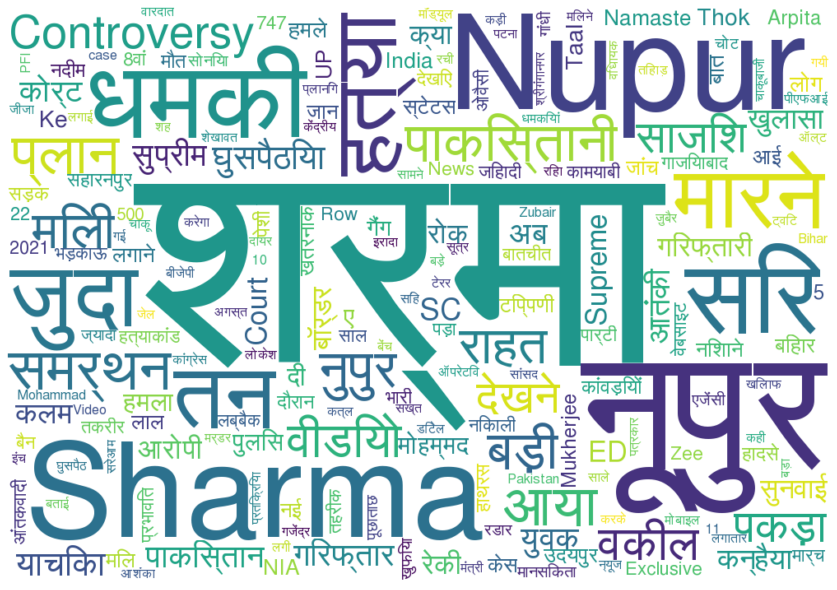

In [52]:
df_list = []
for i in range(len(df)):
    df_list +=df['news_title'][i]

font = "gargi.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()